<a href="https://colab.research.google.com/github/shweth5data/hotel-booking-project/blob/main/day_5_EDA_Hotel_Booking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA Hotel Booking
##### **Contribution**    - Indivisual
##### **Team Member 1 - Shweta Kale**



# **Project Summary -**

Hotel Booking sector is a customer oriented sector and highly competitive market so to be in a profitable & sustainable in market various factors help us to observe Market trend and analyse the data to discover important factors that govern the Hotel bookings.

For Data preparation Steps include import & Load Dataset, check shape od dataset statical information, Data Cleaning, Check Null value, remove null value and replace null value, Figure out Duplicates Value and Remove, Outlier detected and remove.

Assigned room type, Optimal Length stay, Cancellation with deposit type, Cancellation due to assigned room type, • Month wise average ADR & average hotel fees per person, lead time affect the ADR, Demand of special request and meal type preferred by customers, Required car parking spaces.

Repeating Guest are less in number this due to various reason for this guest not satisfied with hospitality, room assigning were diff at the time of booking rooms were different and at the time of check in assign room different due to unavailability of rooms, Higher Waiting time This may be the reason for lesser number of repeating Guest. The demand of A room type is more may be Because of A room having low cost and because of this demand of this in guest is more. Average Lead time and waiting time more in city type hotel,So city hotel due to may be in high demand. So make it guest comfortable city hotel should pre-planned so that customer due to this no cancel the bookings. Average ADR is highest in month august and lowest in November to January and average ADR per person is highest in august month in resort hotel and in city hotel may month

# **Problem Statement**


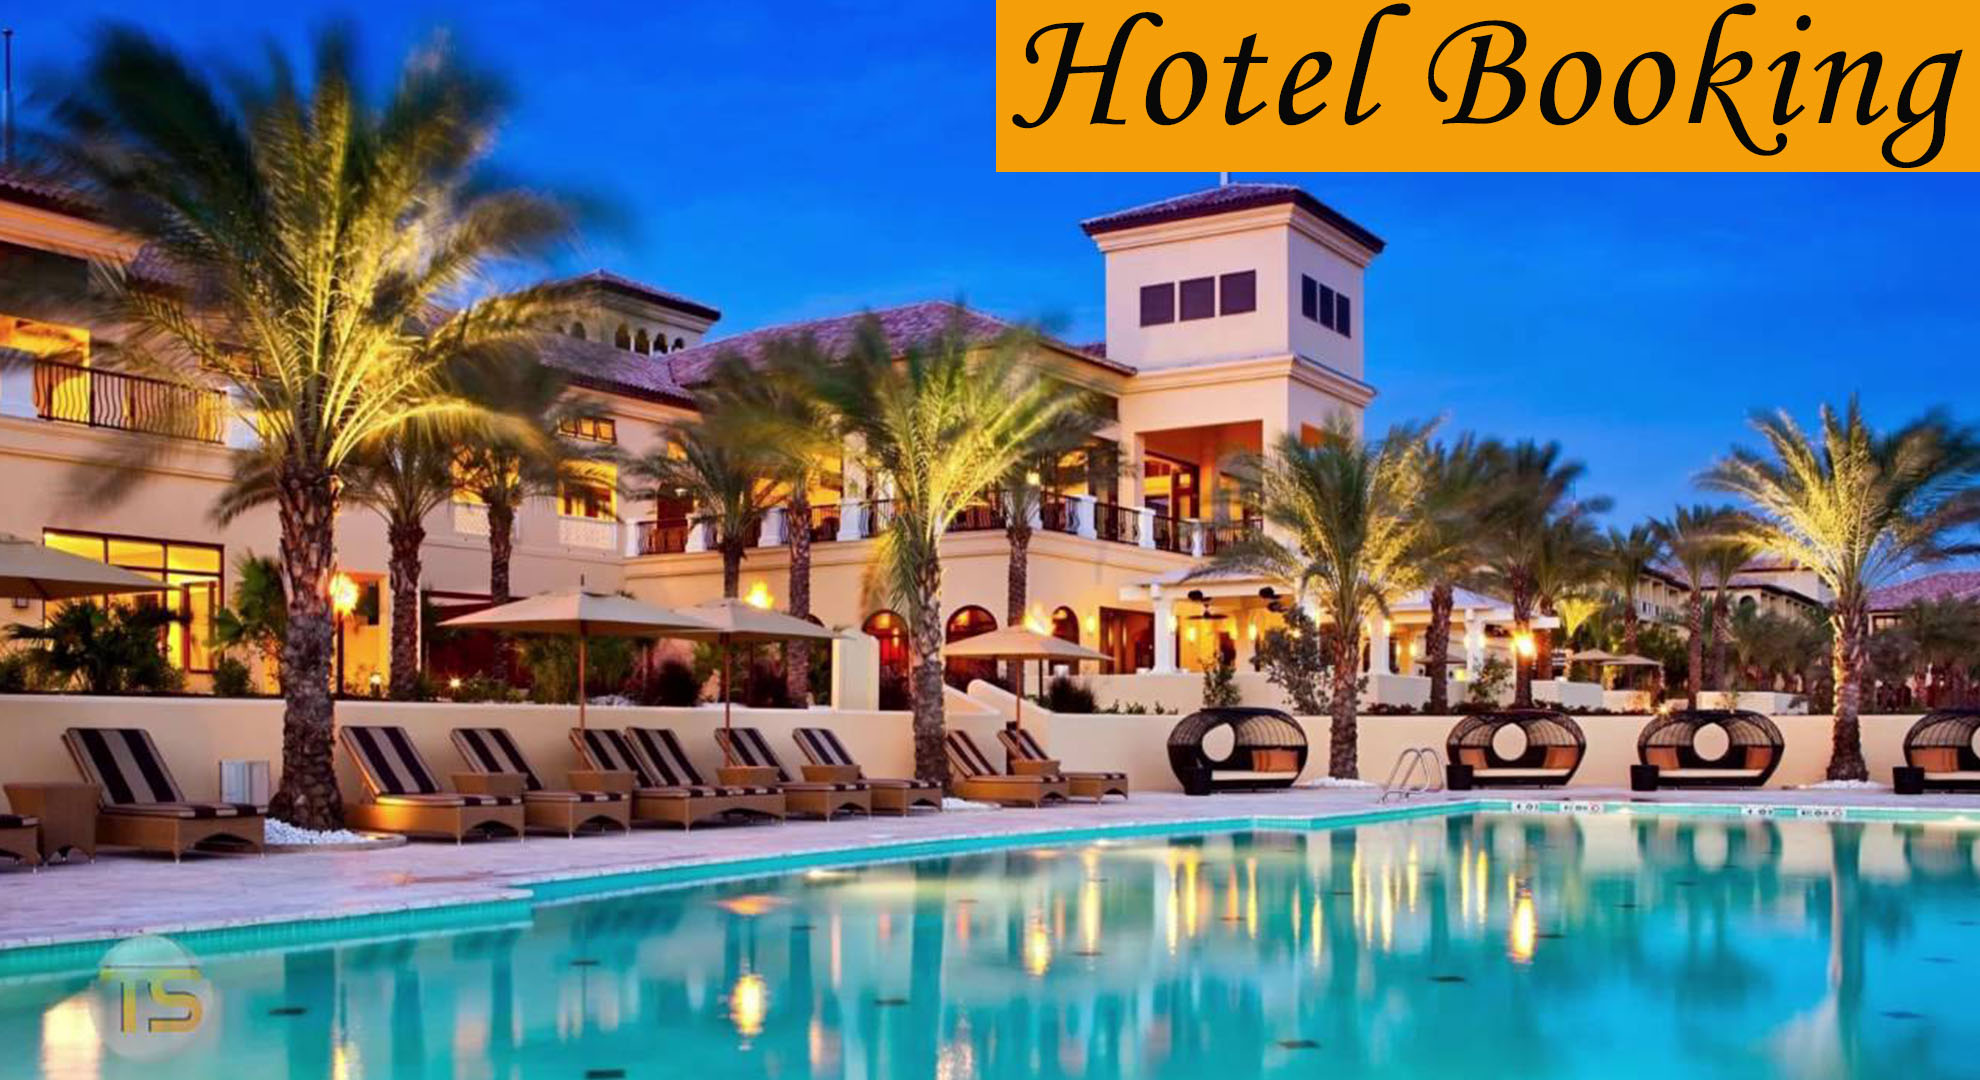



#### **Define Your Business Objective?**

EDA project will encompass data cleaning, preprocessing, and exploratory data analysis techniques. We will employ descriptive statistics, data visualization to extract meaningful patterns and trends from the Hotel booking dataset.

Data Exploration : The data exploration process involved identifying and understanding the characteristics of the data, such as the data types, missing values, and distributions of values.

Data Cleaning : The data cleaning process involved identifying and addressing any issues or inconsistencies in the data, such as errors, missing values, or duplicate records and remove outliers.

Data Wrangling : This step involves transforming bad data into a useful dataset via structuring, enrichment and data manipulation making it ready for further analysis processes.

Data Visualisation : Data visualization is the graphical representation of information and data.It provides an excellent way to understand Increse booking revenue, Enhance Customer satisfaction, Market expansion, Customer Retentation,Cost management & Sustainabilty without confusion.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel booking/Hotel Bookings (1).csv")

### Dataset First View

In [ ]:
# Dataset top 5 Row
df.head()

In [ ]:
# Dataset Bottom 5 Row
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
Missing_values = df.isnull().sum().sort_values(ascending=False).head().reset_index().rename(columns={'index':'Columns',0:'count'})
Missing_values

In [ ]:
# Visualizing the missing values
# Visualizing the missing values

plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),cbar=False,cmap='cool')  # Heatmap to see null values in dataset
plt.title('Missing values display',fontsize=14, fontweight='bold')
plt.xlabel("Dataset Column Name",fontsize=14)

#sky blue --> Non null values
# Magenta --> null values

### What did you know about your dataset?

1)In this dataset 119390 Rows & 32 Columns.

2)In 20 columns contains Numerical data & 12 Columns contains Object.

3)duplicates Data present in  this dataset 31994. we will remove this Duplicates from dataset.

4)Null value present in 4 Columns i.e Company, agent, country, children.

   max null value present in Company columns which we can see in Heatmap visulization

## ***2. Understanding Your Variables***

### Data Description:
**hotel** : 1)Resort Hotel 2)City Hotel).

**is_canceled** :if the booking was canceled (1) or not canceled (0)

**lead_time**:Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

 **arrival_date_year** : arriving Year date

**arrival_date_month**: arriving Month date

**arrival_date_week_number** : Week number in year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday)

**stays_in_week_nights** : Number of stay in  week nights i.e Monday to Friday

**adults** : Number of adults

**children** : Number of children

**babies**: Number of babies

**meal**: Type of meal preferred.

  Undefined/SC – no meal package

  BB – Bed & Breakfast
  
  HB – Half board (breakfast and one other meal)
  
  FB – Full board (breakfast, lunch and dinner)

**country** : Country of origin

**market_segment** : Market segment designation.

TA:- Travel Agents and TO:-Tour Operators

**distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** : The booking name was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer compare to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer compare to the current booking

**reserved_room_type** : Code of room type reserved.

**assigned_room_type** : Code for the type of room assigned to the booking.

**booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type**: customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit – no deposit was made

Non Refund - a deposit was made in the value of the total stay

cost Refundable – a deposit was made with a value under the total cost of stay.

**agent** : ID of the travel agency that made the booking

**company** : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type** : Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it

Group– when the booking is associated to a group

Transient– when the booking is not part of a group or contract, and is not associated to other transient booking

Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr**: It is measured as the total revenues generated by all the occupied rooms in a hotel or lodge divided by the total number of occupied rooms over a given time period. It is a simple average that shows the revenues generated per occupied room.

The average daily rate (ADR) is a useful tool to maximize revenues in the hospitality sector. The ADR is measured as the total revenues generated by all the occupied rooms in the hotel or lodge divided by the total number of occupied rooms over a given time period. The average daily rate includes only the occupied rooms and not the total available stock. List item

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests **: Number of special requests made by the customer

**reservation_status** : Reservation last status, assuming one of three categories:

Check-Out– customer has checked in but already departed

No-Show – customer did not check-in and did inform the hotel of the reason


 **reservation_status_date** : Date at which the last status was set.



In [ ]:
# Dataset Columns
df.columns.tolist()

In [ ]:
# Dataset Describe
# Using Transpose to make visible all column

df.describe().round(3).T

In [ ]:
# statistical information about Object variables in data.
df.describe(include='O').T

City hotel data i.e 79330 is more, highest i.e 113877 guest arrival month is august, Meal selected by Guest is BB i.e breakfast. Market segment Online TA by this mode booking was done, Highest reserved room is A

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check Unique Values for each variable. So that if some wrong entries like #,@,%,?,+,& in string or in integer type coloumn that we are unable to find during null value detection.
for num,col in enumerate(df.columns,1):
    print('\n')
    print(num,')\n','{} : {}'.format(col,df[col].unique().tolist()))

No wrong entries present like #,@,%,?,+,& in string or in integer type coloumns  

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

In [ ]:
# Dropping company column as it contains max. null values.
df.drop(['company'],axis=1,inplace=True)

In [ ]:
# children ,agent columns consists of less null values hence can be replaced by 0
# unavailable country data can be replaced by 'others'

df['children'].fillna(0,inplace=True)
df['country'].fillna('others',inplace=True)
df['agent'].fillna(0,inplace=True)

In [ ]:
# children, agent cannot be present in float datatype hence converted to integer

df['children']=df['children'].astype(int)
df['agent']=df['agent'].astype(int)

In [ ]:
# new columns
# since column 'babies' is added in total people & logically only babies can not visit hotel hence babies column is removed

df['total_people'] = df['adults']+df['babies']+df['children']
df.drop(['babies'],axis=1,inplace=True)

In [ ]:
# new column Total stay

df['total_stay']= df['stays_in_week_nights']+df['stays_in_weekend_nights']

### **New Columns**

In [ ]:
df.columns.tolist()

In [ ]:
# Updated Column shape
df.shape

In [ ]:
# cross-check if all null values are removed from dataframe.
df.isnull().sum().sort_values(ascending=False).head()

### **Check Again Duplicates Value**

In [ ]:
# Finding the duplicate values.
df.duplicated().value_counts()

In [ ]:
# Droping the dulpicate values
df.drop_duplicates(inplace=True)

In [ ]:
# After droping duplicates value finding any duplicate value present
df.duplicated().value_counts()

In [ ]:
# Final Rows & Columns after Dropping Duplicates
df.shape

In [ ]:
# Outlier Detection

clms = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(15,10))
for column in clms:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.gca().set_title('outlier in'+' '+ column,fontsize=12, fontweight='bold')
  plt.tight_layout()

In [ ]:
# capping outliers
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

In [ ]:
# After Removing Outlier

clms = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(15,10))
for column in clms:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.gca().set_title('outlier in'+' '+ column,fontsize=12, fontweight='bold')
  plt.tight_layout()

Manupulation done above :-

*   Company column contains 94% Missing values , hence column is dropped
*   agent, children column has less then 15% missing values hence replced by 0 & replaced by 'others' for country column.


*   after removing Duplicates data has

1.   Rows -->87389
2.   columns--> 32









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
Preferred_by_customer=df['hotel'].value_counts()
Preferred_by_customer

In [ ]:
# Hotel Preferred by customer

fig = plt.figure(figsize=(15,6))

Preferred_by_customer.plot(kind='pie', colors=['orangered', 'blue'], autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14},explode = (0, 0.1),shadow=True)
plt.title('Most preferred Hotel',fontsize=15,fontweight="bold")
plt.ylabel('')


plt.show()

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of slices of the pie generally represent the percentage of the parts of the data. Pie charts can be a useful visualization tool in certain situations due to their ability to convey information in a visually appealing and easy-to-understand manner.

##### 2. What is/are the insight(s) found from the chart?

Most demanded Hotel type is City hotel type here we can see that 61% guest prefered to city hotel and 38% guest prefered Resort Hotel

##### 3. Will the gained insights help creating a positive business impact?


Most of the customer are Working professional and pefer to book hotel Within the city

#### Chart - 2

In [ ]:
# cancelation and non-cancellation
canc_no_canc=df.copy()
canc_no_canc['is_canceled'] = canc_no_canc['is_canceled'].replace([1,0], ['canceled', 'not_canceled'])

canc_no_canc = canc_no_canc.groupby('is_canceled')['is_canceled'].count()
canc_no_canc

In [ ]:
# Cancellation and Non-Cancellation
fig = plt.figure(figsize=(10,5))

canc_no_canc.plot(kind='pie',startangle=280, pctdistance=0.85, explode = (0, 0.1),autopct='%1.1f%%')
plt.title('cancellation and non cancellation',fontsize=15,fontweight='bold')
plt.ylabel('')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

##### 1. Why did you pick the specific chart?

Donut charts are used to show the proportions of categorical data, with the size of each piece representing the proportion of each category.


##### 2. What is/are the insight(s) found from the chart?

 72% guest are satisfied with their booking and not canceling theirs booking

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cancellation of booking shows that customers are not satisfied either due to Waiting perriod high, cost price of room etc.

#### Chart - 3

In [ ]:
#Sector from which most of the customers coming

# Transient = when the booking is not part of a group or contract, and is not associated to other transient booking
sns.countplot(data=df,x='customer_type',hue='hotel')
plt.title("Customer types hotel wise",fontsize=14, fontweight='bold')
plt.xlabel('Customer types',fontsize=12)
plt.plot()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

Transient booking is more done in both hotel

At most hotels, guests fall into two main categories: group and non-group. Amongst the non-group category are transient travellers: these are guests who are predominantly on-the-move and seek short (and often urgent!) hotel stays, like business people who travel during the week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Transient Booking Shows highest number in both types of hotel. This will help in revenue generation

#### Chart - 4

In [ ]:
#People preference with childrens?
sns.countplot(data=df,x='children',hue='hotel')
plt.title("Preference of hotel with childrens",fontsize=14, fontweight='bold')
plt.xlabel("Number of children")
plt.plot()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

Customer booked hotel either single or couple but non children are more in number

#### Chart - 5

In [ ]:
# Chart - 5
# subplot of reserved room type and assigned room type.

# Reserved Room type code
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,5))
sns.countplot( x=df['reserved_room_type'],hue=df['hotel'],ax=ax1)
ax1.title.set_text('Reserved_room_type')

# Assigned Room type code
sns.countplot(x=df['assigned_room_type'],hue=df['hotel'] ,ax=ax2 )
ax2.title.set_text('Assigned_room_type')

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

Frome above visualization A type  room is booked by most of the customer but at the time of check in rooms  assigned to the customer are not same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not providing a customers preferd room may result to cancel the booking at the time of check in. this will lead to negative impact in business

#### Chart - 6

In [ ]:
# Chart - 6
# Booking Changes Done by customer

booking_changes=df[(df['booking_changes']!=0) & (df['booking_changes']< 10)]
booking_changes=booking_changes[['hotel','booking_changes']]
booking_changes

In [ ]:
fig=plt.figure(figsize = (10,5))

sns.countplot(x='booking_changes',hue='hotel',data=booking_changes)
plt.title("Booking changes by customers ",fontsize=20, fontweight='bold')
plt.xlabel("booking_changes", fontsize=14 )
plt.ylabel("count",fontsize=14 )


plt.show()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships

##### 2. What is/are the insight(s) found from the chart?

1 time booking changes done by customer is more. it may be because Reshedule in plan, long waiting perriod etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If booking changes due to reshedule or postpone in customers plan then it would not show any negative impact but if it is due to hotel services, assigned room type not avilable at the time of booking not avilable or waiting perriod of room confomation then it will impact negative growth

#### Chart - 7

In [ ]:
# Chart - 7
#Most booking by which segment and distribution channel

#segment wise

preferred_segmnet=df.groupby('market_segment')['market_segment'].count()
preferred_segmnet

# distribution wise

distribution_wise=df.groupby('distribution_channel')['distribution_channel'].count()
distribution_wise

print(preferred_segmnet,'\n\n',distribution_wise)

In [ ]:
# segment and distribution channel

fig=plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df, palette="Set2")
plt.title('Types of market segment',fontweight="bold", fontsize=20)
plt.xlabel('market_segment',size=15)


plt.subplot(1, 2, 2)
sns.countplot(x='distribution_channel', data=df, palette='rocket')
plt.title('Distribution_channel',fontweight="bold", fontsize=15)
plt.xlabel('distribution_channel',size=15)

plt.show()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

Most of the booking done by Online travel agent with some booking charges and in distribution channel Online tour agent /Offline tour Agent did most of the bookings.
 mostly booking done by tour operators agents.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will show positive impact  on business. Tour agent provide hassel free services to customers for this reason customers choosen booking through agent.

#### Chart - 8

In [ ]:
# Chart - 8
#Demand of special request and meal type preferred by customers


# special request done by customers

most_special_request=df.groupby('total_of_special_requests')['total_of_special_requests'].count().sort_values(ascending=False)
special_req=most_special_request.copy()
#special_req.drop(index=[0],inplace=True)
special_req=pd.DataFrame(special_req).rename(columns={'total_of_special_requests':'count of request'})

special_req

In [ ]:
# Meal type preferred by customers
meal_prefered=df.groupby('meal')['meal'].count()

meal_prefered

In [ ]:
 # subplot of special request and meal type done by customers.
fig = plt.figure(figsize=(15,5))

# For special request.
plt.subplot(1,2,1)

sns.lineplot(data=special_req,x='total_of_special_requests',y='count of request')
plt.title("Demand of Special Request ",fontsize=20,fontweight='bold')
plt.xlabel("special request", fontsize=15)
plt.ylabel("Total count of request",fontsize=15)


plt.grid(axis='y')



# For meal
plt.subplot(1,2,2)

sns.countplot(data=df,x='meal')
plt.title('most meal prefered',fontsize=20,fontweight='bold')
plt.xlabel("Meal", fontsize=15)
plt.ylabel("count",fontsize=15)


plt.show()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

Most of the booking done in city hotel and for 1 day only because of this in above visualization no any special request demand show high and in meal breakfast and bed in higher number.

#### Chart - 9

In [ ]:
#Optimal Length stay of Hotel
fig=plt.figure(figsize=(15,5))

not_canceled=df.copy()
not_canceled=not_canceled[not_canceled['is_canceled']==0]
optimal_stay_length= not_canceled[not_canceled['total_stay'] < 15]

sns.kdeplot(x =optimal_stay_length['total_stay'], hue = optimal_stay_length['hotel'])
plt.title('Optimal length of stay',fontsize=14,fontweight='bold')
plt.xlabel("total_stay'", fontsize=15 )
plt.ylabel(' ')

plt.show()

##### 1. Why did you pick the specific chart?

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Optimal length stay in city hotel are 1, 2 &3

Optimal length stay in resort hotel are 1day, 2 day , 7 days

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This directly impact in Business growth. More number of booking high revenue will be generated.

#### Chart - 10

In [ ]:
# Chart - 10
# ADR variation within month of continious 3 Year
# adr -> avg. daily rate

plt.figure(figsize=(20,5))
sns.lineplot(y='adr',x='arrival_date_month',hue= 'arrival_date_year',data=df)
plt.title('Adr vs Month for every year',fontsize=14, fontweight='bold')
plt.xlabel(' ')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

The important use of line graph is to track the changes over the short and long period of time. It is also used to compare the changes over the same period of time for different groups.

##### 2. What is/are the insight(s) found from the chart?

In august month ADR is high because most of the customers check in hotel found in august month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher ADR and booking also will generate high revenue and same we got in August month in continious 3 year

#### Chart - 11

In [ ]:
# Chart - 11
# Adr variation with months
plt.figure(figsize=(20,5))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.title('ADR Variation by Hotel-Type Monthly distribution',fontsize=14, fontweight='bold')
plt.xlabel(' ')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

The important use of line graph is to track the changes over the short and long period of time. It is also used to compare the changes over the same period of time for different groups.

##### 2. What is/are the insight(s) found from the chart?

for city hotel it is quite stable.

2. daily rate of resort hotel is higher then city hotel in month of july,august whereas it is lower in other months

3. to book **resort in summer months**(july,aug,sept) at **best price** , booking can be done in advance where adr is less.

City hotel mostly booked by working professional, resort hotel booked by those customers who planned for vacassion.

#### Chart - 12

In [ ]:
# Chart - 12
#How lead time affect the ADR
adr_df=df[df["adr"]<=1000]
sns.jointplot(x="lead_time", y="adr", data=adr_df, s = 15,color='c')
plt.show()

##### 1. Why did you pick the specific chart?

A Jointplot is a figure that showcases the relationship between two variables, combining scatter plots, hexbin plots, regression plots, or 2D kernel density plots with histograms, KDE (Kernel Density Estimate) plots, or other representations of the univariate distribution of each variable on the margins.

##### 2. What is/are the insight(s) found from the chart?

The joint plot shows that increased lead time is associated with lower ADR, this would suggest that people who book far in advance enjoy lower costs for Hotels as compared to shorter bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More lead time low adr this will help to hotel industry. They can cover their Expenses by this type of booking and in less Lead Time booking Hotel industry can generate more profit

#### Chart - 13

In [ ]:
# Chart - 13
# Cancellation with  Market segment

mothly_cancelation=df.copy()
mothly_cancelation1=mothly_cancelation[mothly_cancelation['is_canceled']==1]
mothly_cancelation1

plt.figure(figsize=(13,5))
sns.countplot(x='market_segment', data=mothly_cancelation1)
plt.title('cancellation with Market segment ',fontsize=14, fontweight='bold')
plt.xlabel(" ")
plt.show()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

Most of the booking done thorugh Online tours Agent. So cancellation also done through Online TA.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the cancellation done because of waiting time, booked rooms type not avilable at the time of check then it will impact on hotel booking business

#### Chart - 14

In [ ]:
# Chart - 14
# cancellation month wise
mothly_cancelation=df.copy()
mothly_cancelation1=mothly_cancelation[mothly_cancelation['is_canceled']==1]
mothly_cancelation1

fig=plt.figure(figsize=(15, 5))

sns.countplot(x='arrival_date_month', hue = 'hotel' , data = mothly_cancelation1)
plt.title('month wise cancellation',fontsize=20,fontweight='bold')
plt.xlabel('month', fontsize=15 )
plt.ylabel("count",fontsize=15 )


plt.show()

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships

##### 2. What is/are the insight(s) found from the chart?

Most of the hotel rooms booked in June, july & August month So cancellation also we can see in august month, july & june.

#### Chart - 15

In [ ]:

#Cancellation with Deposit type

ax=sns.countplot(x='deposit_type', hue='is_canceled',data=df)
plt.title('Cancellation rate with Deposit type',fontsize=14, fontweight='bold')
plt.xlabel(" ")
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

l = plt.legend()
l.get_texts()[0].set_text('Not Cancelled')
l.get_texts()[1].set_text('Cancelled');

##### 1. Why did you pick the specific chart?

A Countplot will help in understanding the frequency or distribution of different categories within those variables. We can even compare the counts or proportions of different categories within a single categorical variable or across multiple categorical variables which is useful for identifying patterns and relationships

##### 2. What is/are the insight(s) found from the chart?

booking canceled -->

26% no deposit 1.1% non refundable 0% in Refundable deposit type No Deposit is highly preferred payment mode by customer but it comes with disadvantage for hotels as people with no deposte has highest chances of Booking cancellation

#### Chart - 16

In [ ]:

waiting_list=df.copy()
waiting_list=waiting_list[waiting_list['days_in_waiting_list']>0]

fig=plt.figure(figsize=(10, 5))
sns.histplot(x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_list)
plt.title('cancellation done due to More Wating time',fontsize=14,fontweight='bold')
plt.xlabel('Waiting list', fontsize=15 )
plt.ylabel("count",fontsize=15 )


plt.show()

##### 1. Why did you pick the specific chart?

---



A histogram is used to represent data provided in the form of some groups. It is an accurate method for the graphical representation of numerical data distribution

##### 2. What is/are the insight(s) found from the chart?

if the waiting time of rooms is upto 40, Cancellation of roomes done by customer is more. After 40 days waiting perriods room booked less in number.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Frequent Cancellation due to more waiting perriod of rooms conformation will definatly impact Hotel business growth.

#### Chart - 17

In [ ]:
fig=plt.figure(figsize=(10, 5))

sns.kdeplot(x = 'lead_time', hue = 'is_canceled' , data =df)
plt.title('cancellation done with lead time',fontsize=20,fontweight='bold')
plt.xlabel('lead time', fontsize=15 )
plt.ylabel("count",fontsize=15)



plt.show()

##### 1. Why did you pick the specific chart?

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data

#### Chart - 18

In [ ]:
# Filter the data to include only non-canceled bookings
country_visitors = df[df['is_canceled']==0].groupby(['country']).size().reset_index(name='count')

top_20_countries = country_visitors.nlargest(20, 'count')

# Print the dataframe
print(top_20_countries)


# Create the choropleth map
fig = px.choropleth(
    top_20_countries,
    locations='country',
    locationmode='ISO-3',  # Use 'ISO-3' for 3-letter country codes.
    color='count',
    hover_name='country',  # Column to add to hover information
    hover_data={'count': True},  # Show the count in the hover info
    color_continuous_scale=px.colors.sequential.Plasma,  # Change the color scale here
    range_color=(country_visitors['count'].min(), country_visitors['count'].max()),  # Ensure the full range is covered
    title="Home country of visitors"
)

# Show the map
fig.show()


##### 1. Why did you pick the specific chart?

A map chart is useful for presenting and analyzing geographically based data clearly and concisely

##### 2. What is/are the insight(s) found from the chart?

Above Observation from Map a huge number of visitors from western europe namely France,UK and Portugal being the highest, probably the hotel is located in Portugal itself.




#### Chart - 19 - Correlation Heatmap

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
corr=num_df.corr(method='kendall')
matrix=np.triu(corr)
sns.heatmap(corr,annot=True,mask=matrix)
plt.title('Heatmap-Strength of Correlation',fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap helps you quickly identify relationships between pairs of variables in a dataset.

 A correlation heatmap provides insights into how different variables are related to each other. This can be helpful for understanding the structure of the data and identifying potential patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlations are often represented in bright colors (less shaded areas), while strong negative correlations are represented in dark colors (dark shaded areas). Weak or no correlations are displayed in neutral colors (white areas).

The numbers displayed in each cell of the heatmap represent a quantitative value, such as a correlation coefficient or any other measure of association between two variables. These numbers indicate how strongly or weakly the two variables are related. These numbers could be: Pearson correlation coefficients ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation) to 0 (no correlation).





1. highest positive correlation seen in repeated guest & previous_booking_not_canceled. it indicates repeated guest are not likely to canceling bookings

2. adr & total people also has positive corrlation i.e. adr increases with increase in total people.

#### Chart - 20

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is used to explore relationships between pairs of variables in a dataset. It creates a grid of scatterplots and histograms, making it a useful tool for several purposes in data analysis like : 'Identifying Relationships', 'Correlation Analysis', 'Pattern Recognition' etc.

##### 2. What is/are the insight(s) found from the chart?

The patterns we encounter above in the pairplot are:

1) Positive Linear Relationship: Points form a roughly straight line that slopes upward from left to right.

2) Negative Linear Relationship: Points form a roughly straight line that slopes downward from left to right.

3) No Clear Relationship: Points are scattered randomly without forming a clear pattern or trend.

4) Non-Linear Relationship: Points form a curved or nonlinear pattern.

5) Clustering or Grouping: Points cluster or group together in distinct clusters or patterns.

6) Outliers: A few data points stand out as distant from the main cluster of points.

7) Concentration Along the Axes: Points cluster mainly along one of the axes (horizontal or vertical).

## **5. Solution to Business Objective**



*   Provide the specific room type to customer which was choosen by customer at the time of booking
*   If any options for any room type like Smoking/ non smoking room, higher Floor, or a room with View give details.


*   Provide Any membership discount to increase Repetitive customer.


* Hotel industry should offer such schemes in their off-seasons, so that hotel industry expense recover from that scheme and so that in their peak time they generate profit.
*   Any restriction for baby child or pets, if not then improve pet friendly aminities also

*   Provide relaxation In Checkout time if possible.







# **Conclusion**


1. City hotel is highly preferred over resort hotel , booking made for
  * city hotel--> 61% ,
  * Resort hotel-->39%

2. Most of the customers are from Transient type ( booking is not part of a group or contract)

3. **peak season - adr relation**

* adr increases when demand increases & drops as demand decreases (high rush --> high booking -->high adr)

4. **Best time to book hotel room**
* Highly preferred arraival month is August , july but adr is high during this peak season , so one can do advance booking when prices are down

* To get **resort hotels** at **least price** less than 60 adr one can book hotel in **November , january**

5. **Revenue genration**

* customers preferring resort-hotel more after june and crowd increases suddenly ,but **before peak season demand is very poor** in order to manage that ,Resort Hotels can increase revenue by attracting customers before peak season (june)


6. **Special request**

* hotels are likely to recieve high special requests in peak months like August , july

7. **Optimal length of stay**

* usual stay length is about 3-4 days for which city hotel is more preferred where as resort hotel is preferred fo longer stay (week)


8. **Most of the visitors** from western European  countries like Portugal,United Kingdom ,france,spain. more capital can be invested in this areas.

9. **Repeated Guest**

* 4% of Repeated guests , it seems like repeated guests are aware about months when adr increases , as repeated guest arriaval is high in less demand months

* repeated customers are less likely to cancel their bookings hence can be considered as sign of booking confirmation by this category

10. Customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average.













### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***